# Getting the S-PLUS colored imagen 

Here, we show how to get the colored images from the S-PLUS database using $\textbf{splusdata}$ package. With this package, it is possible to download colored images combining three bands and/or combining all twelve bands.

In [1]:
# Import the necessary packages 
import splusdata 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect
conn = splusdata.connect('Luis', 'plutarco*80') 

You have access to internal data


In [3]:
# Load the csv table
df = pd.read_csv('../3filter_noflat/PN-DR3_noFlag_3ferr_merge-3version.csv')
df.columns

Index(['Unnamed: 0', 'Field', 'ID', 'RA', 'DEC', 'FWHM', 'ISOarea',
       'KRON_RADIUS', 'nDet_magPStotal', 'PhotoFlagDet', 'U_PStotal',
       'F378_PStotal', 'F395_PStotal', 'F410_PStotal', 'F430_PStotal',
       'G_PStotal', 'F515_PStotal', 'R_PStotal', 'F660_PStotal', 'I_PStotal',
       'F861_PStotal', 'Z_PStotal', 'e_U_PStotal', 'e_F378_PStotal',
       'e_F395_PStotal', 'e_F410_PStotal', 'e_F430_PStotal', 'e_G_PStotal',
       'e_F515_PStotal', 'e_R_PStotal', 'e_F660_PStotal', 'e_I_PStotal',
       'e_F861_PStotal', 'e_Z_PStotal', 'r - i', 'r - J0660', 'e(r - i)',
       'e(r - J0660)', 'P(GoodPho)', 'P(BadPho)', 'Labels', 'Prob PN',
       'Prob all else'],
      dtype='object')

# Colored Image: 3- bands

Getting lupton image:

By default:

-) R_color = "I"

-) G_color = "R"

-) B_color = "G"

-) stretch = 3

-) Q = 5

Doing the colored images of the objects in the pandas DataFrame in a loop. The function that create the colored images by combining the 3-bands is $\textbf{conn.get_img}$:

In [4]:
images = []
id_ = []
for key, value in df.iterrows():
  img = conn.get_img(value.RA, value.DEC, 200, R="I", G="R", B="G", stretch=0.5, Q=5)
  images.append(img)  # Add the PIL image resuls in a list
  id_.append(value.ID) # Add the ID of the objects in a list 
  print(value.RA, value.DEC)

158.85933642579573 -24.753136157195524
162.51665837739276 -36.559061176506674
330.8130711615092 1.2891533854468642
316.4731956938531 -37.14456181858315
158.8553579623175 -24.74819166187371
40.89837979736232 1.3771938278420643
11.994479645329305 -31.97850191723796
199.4331632480484 -1.000304791159635
163.53634718988116 -37.04565696254532
156.96556060694496 -43.90370677872753
156.9637129340573 -43.90389541595707
156.9655292631724 -43.90377424167153
9.789238950909432 0.6698562687124668
21.24917706369621 -34.64933479395216
186.4280748118269 0.5727372676461775
38.39285833594685 -39.04470809996566


In [5]:
# Definition to do the colored images from the PIL image and save the resulted images
def plot_images(data, id_):
    fig, ax = plt.subplots()
    ax.imshow(data, origin='lower')
    plt.savefig(id_ + ".jpg")   # Save the images

Look  the RGB images of all the object in the DataFrame using de definion plot_images. Use the images list (contains the PIL images) to generate the images and the id_ list as the names to save the image files.

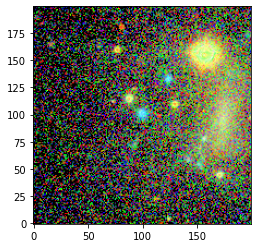

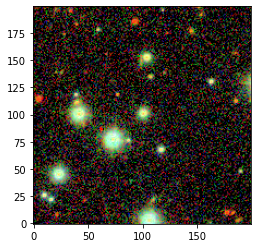

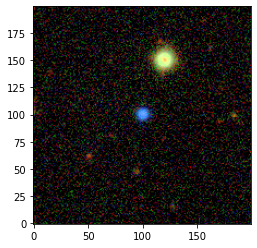

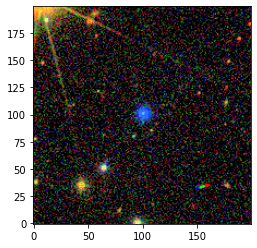

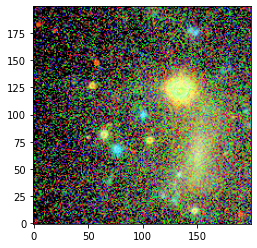

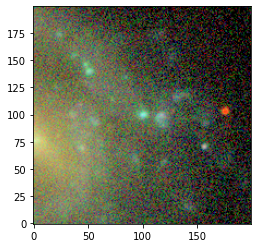

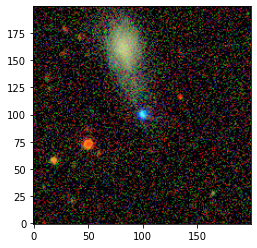

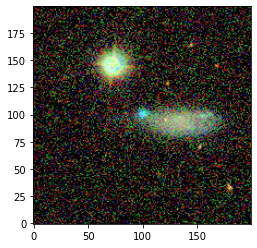

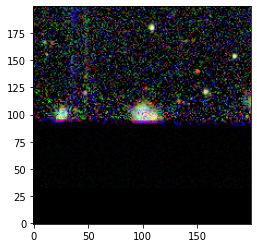

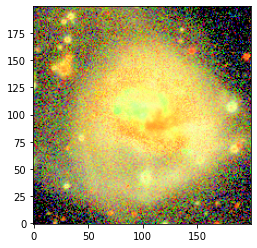

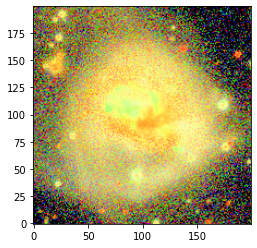

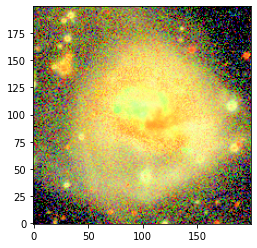

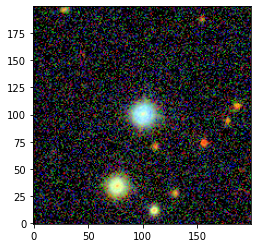

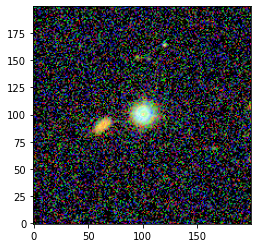

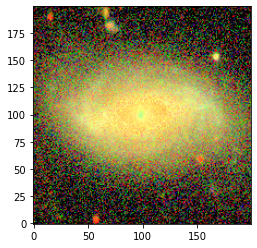

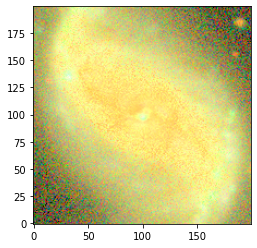

In [6]:
for i in range(len(images)):
    plot_images(images[i], id_[i])

# Colored Image: 12- bands

    By default
    
    
    -) noise=0.15
    
    -) saturation=0.15

Create colored images using the twelves bands of S-PLUS. The function that create the colored images by combining the 12-bands is $\textbf{conn.twelve_band_img}$.

In [7]:
images_12 = []
for key, value in df.iterrows():
  img_12 = conn.twelve_band_img(value.RA, value.DEC, radius=90, noise=0.15, saturation=0.15)
  images_12.append(img_12)  # Add the PIL image resuls in a list

Generate the images using de definition "plot_images"

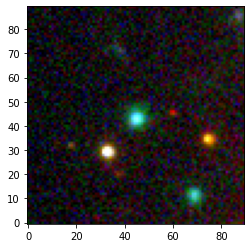

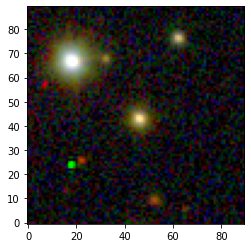

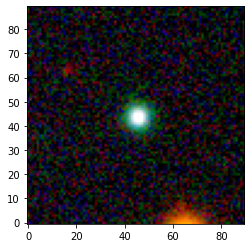

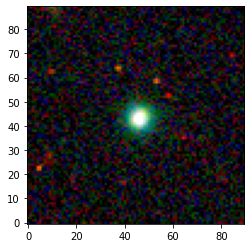

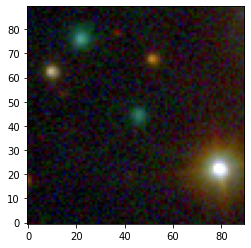

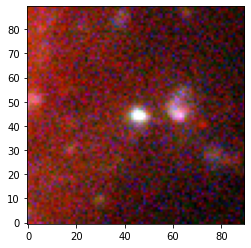

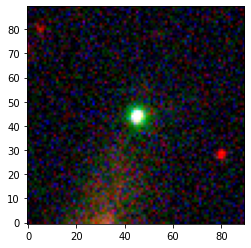

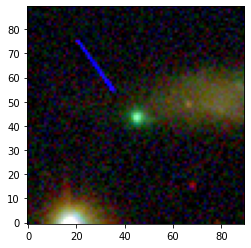

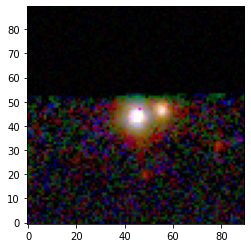

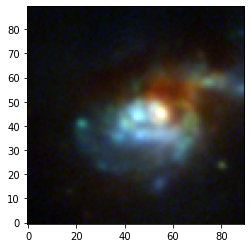

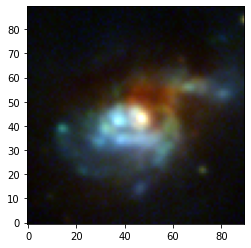

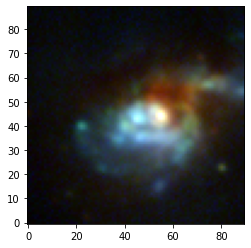

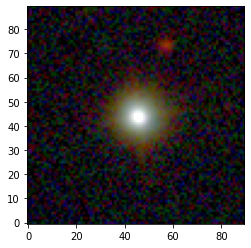

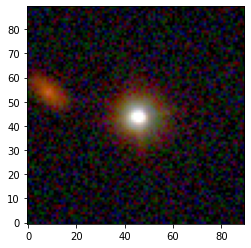

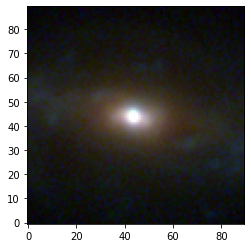

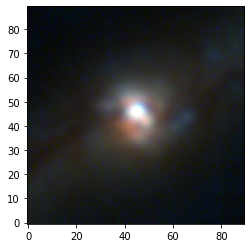

In [8]:
for i in range(len(images_12)):
    plot_images(images_12[i], id_[i])